In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [4]:
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d/%m/%y').weekday() 
    return (calendar.day_name[born]) 
  
# Driver program 
#date = '15/12/14'
#print(findDay(date))

In [5]:
def timeconversion(data):
    data[['date','start_time']] = data['startTime'].str.split(" ",expand=True)
    data['day'] = data['date'].apply(findDay)
    data['startTime'] = pd.to_datetime(data['startTime'],format='%d/%m/%y %H:%M')
    data['endTime'] = pd.to_datetime(data['endTime'],format='%d/%m/%y %H:%M')
    return data

In [6]:
data = timeconversion(data)

In [7]:
def gender(data):
    data['gender'].replace(['male','female'],[0,1],inplace=True)
    return data


In [8]:
data = gender(data)

In [9]:
data.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
date           0
start_time     0
day            0
dtype: int64

1    8192
0    2308
Name: gender, dtype: int64

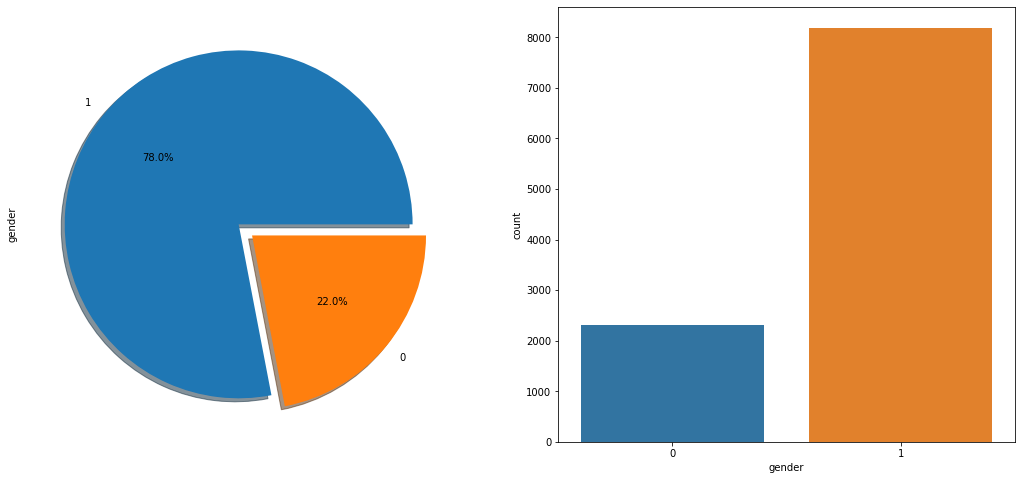

In [10]:

f,ax = plt.subplots(1,2,figsize = (18,8))
data['gender'].value_counts().plot.pie(autopct = '%1.1f%%',explode = [0,0.1],shadow = True,ax = ax[0])
sns.countplot('gender',data = data)
data['gender'].value_counts()

In [11]:
data.groupby(['day','gender'])['gender'].count()

day        gender
Friday     0          409
           1         1510
Monday     0          432
           1         1538
Saturday   0          368
           1         1460
Sunday     0          373
           1          924
Thursday   0          145
           1          651
Tuesday    0          341
           1         1299
Wednesday  0          240
           1          810
Name: gender, dtype: int64

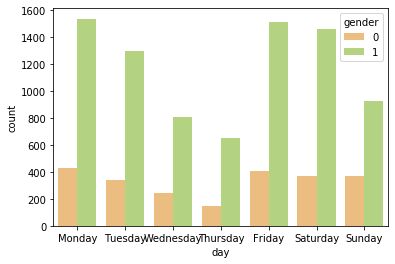

In [12]:
sns.countplot('day',data = data, hue = 'gender',palette='RdYlGn',order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])

In [13]:
def convertweekday(data):
    data['day'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],[0,1,2,3,4,5,6,],inplace=True)
    data['time'] = data['endTime'] - data['startTime']
    data['time'] = data['time']/np.timedelta64(1,'m')
    return data
data = convertweekday(data)

In [14]:
data.head()

,session_id,startTime,endTime,ProductList,gender,date,start_time,day,time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,15/12/14,18:11,0,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0,16/12/14,14:35,1,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,1,01/12/14,15:58,0,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1,23/11/14,2:57,6,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0,17/12/14,16:44,2,2.0


In [15]:

data.sort_values('time')

,session_id,startTime,endTime,ProductList,gender,date,start_time,day,time
5249,u13003,2014-12-07 16:23:00,2014-12-07 16:23:00,A00002/B00002/C00003/D21111/,1,07/12/14,16:23,6,0.0
4064,u13474,2014-11-18 12:09:00,2014-11-18 12:09:00,A00002/B00003/C00046/D01180/,1,18/11/14,12:09,1,0.0
7766,u10704,2014-11-14 08:33:00,2014-11-14 08:33:00,A00004/B00013/C00062/D00254/,1,14/11/14,8:33,4,0.0
7767,u24528,2014-12-18 15:05:00,2014-12-18 15:05:00,A00001/B00009/C00186/D18615/,1,18/12/14,15:05,3,0.0
7769,u21479,2014-12-12 09:34:00,2014-12-12 09:34:00,A00005/B00044/C00184/D24384/,0,12/12/14,9:34,4,0.0
...,...,...,...,...,...,...,...,...,...
8048,u16171,2014-11-18 21:10:00,2014-12-18 09:07:00,A00005/B00032/C00094/D07481/;A00002/B00001/C00...,1,18/11/14,21:10,1,42477.0
3662,u13872,2014-11-15 12:35:00,2014-12-15 12:13:00,A00002/B00007/C00016/D00969/;A00002/B00003/C00...,1,15/11/14,12:35,5,43178.0
7402,u15048,2014-11-17 01:08:00,2014-12-17 12:21:00,A00005/B00060/C00200/D04877/;A00002/B00002/C00...,1,17/11/14,1:08,0,43873.0
1560,u14758,2014-11-16 14:18:00,2014-12-19 13:14:00,A00003/B00028/C00148/D04063/;A00002/B00005/C00...,1,16/11/14,14:18,6,47456.0


In [16]:
print("Max time: ",data['time'].max())
print("Min time: ",data['time'].min())
print("Avg time: ",data['time'].mean())

Max time:  49269.0
Min time:  0.0
Avg time:  123.46771428571428


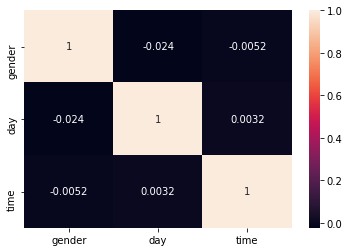

In [17]:
sns.heatmap(data.corr(),annot=True)

In [148]:
data.head()

,session_id,startTime,endTime,ProductList,gender,date,start_time,day,time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,15/12/14,18:11,0,1.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0,16/12/14,14:35,1,6.0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,1,01/12/14,15:58,0,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1,23/11/14,2:57,6,3.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0,17/12/14,16:44,2,2.0


In [19]:
from collections import Counter

In [149]:
#Custom function for extract infor from product list
def extract_product(str):
    print(str)
    if ";"  in str:
        prd_lst = str.split(";")
        
        count_item = len(prd_lst)
        first_lv1 = prd_lst[0].split("/")[0]
        first_lv2 = prd_lst[0].split("/")[1]
        #first_lv3 = prd_lst[1].split("/")[0]
        #first_lv4 = prd_lst[1].split("/")[1]
        print("first_lvl",first_lv1)
        lv1_lst =[]
        lv2_lst =[]
        #lv3_lst =[]
        #lv4_lst =[]
        for item in prd_lst:
            lv1_lst.append(item.split("/")[0])
            lv2_lst.append(item.split("/")[1])
            #lv3_lst.append(item.split("/")[2])
            #lv4_lst.append(item.split("/")[3])
        print(lv1_lst)
        unique_lv1 = len(set(lv1_lst))
        unique_lv2 = len(set(lv2_lst))
        most_freq_lv1 =  max(lv1_lst, key=Counter(lv1_lst).get)
        print("unique_lv1",unique_lv1)
        print("most_freq_lv1",most_freq_lv1)
    else:
        lv_lst = str.split("/")
        first_lv1 = lv_lst[0]
        first_lv2 = lv_lst[1]
        count_item = 1
        unique_lv1 = 1
        unique_lv2 = 1
        most_freq_lv1 = first_lv1
    return (count_item,first_lv1,first_lv2,unique_lv1,unique_lv2,most_freq_lv1)    

#Feature Extraction :
new_col = ('NumProduct','FirstA','FirstB','UniqueA','UniqueB','MostA')      
new_col_lst = data['ProductList'].apply(lambda x: extract_product(x))    
new_col_df = pd.DataFrame(new_col_lst.tolist(),columns =new_col)

A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00009/C00031/D29404/;A00001/B00009/C00031/D02617/;A00001/B00009/C00031/D29407/;A00001/B00009/C00031/D29410/;A00001/B00009/C00031/D29411/;A00001/B00009/C00031/D25444/;A00001/B00009/C00031/D29418/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00020/D16944/
A00002/B00004/C00018/D10284/;A00002/B00004/C00018/D10285/;A00002/B00004/C00018/D10286/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00001/C00012/D30805/;A00001/B00001/C00012/D30806/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00081/D25039/
A00002/B00011/C00180/D18487/;A00002/B00011/C00114/D18459/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
m

unique_lv1 1
most_freq_lv1 A00002
A00001/B00009/C00032/D27600/;A00001/B00004/C00066/D27601/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00053/D04336/
A00001/B00009/C00028/D18455/;A00002/B00007/C00276/D27953/;A00002/B00007/C00027/D30082/
first_lvl A00001
['A00001', 'A00002', 'A00002']
unique_lv1 2
most_freq_lv1 A00002
A00003/B00012/C00051/D30600/
A00003/B00012/C00028/D13870/;A00003/B00035/C00106/D14240/;A00003/B00028/C00179/D14246/;A00003/B00028/C00179/D14254/;A00003/B00028/C00179/D14255/;A00003/B00028/C00179/D14257/;A00003/B00028/C00179/D14258/;A00003/B00028/C00179/D13913/;A00003/B00028/C00179/D13914/;A00003/B00028/C00179/D14261/;A00003/B00028/C00179/D14262/;A00003/B00028/C00179/D13920/;A00003/B00028/C00179/D13927/;A00003/B00028/C00179/D13364/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B000

['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00001/B00001/C00019/D05339/
A00002/B00007/C00021/D09208/
A00003/B00022/C00028/D00605/;A00003/B00022/C00028/D00611/;A00003/B00022/C00028/D00612/;A00003/B00022/C00028/D00614/;A00003/B00022/C00028/D00616/;A00003/B00022/C00028/D00617/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00002/C00007/D32699/;A00002/B00002/C00007/D35065/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00022/C00048/D15127/
A00003/B00012/C00048/D22461/
A00001/B00004/C00066/D02690/
A00001/B00001/C00012/D25433/;A00001/B00009/C00031/D09903/;A00001/B00009/C00031/D07442/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00010/D22761/;A00003/B00012/C00036/D22766/
first_lvl A00002
['A00002', 'A00003']
unique_lv1 2
most_freq_lv1 A00002
A00002/B00005/C00125/D02231/;A00002/B00003/C00014/D02998/;A00002/B00003/C00014/D19690

['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00005/B00018/C00325/D10538/
A00002/B00001/C00123/D05479/;A00002/B00001/C00123/D05414/;A00002/B00001/C00123/D08503/;A00002/B00001/C00123/D21043/;A00002/B00001/C00123/D21049/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00053/D03717/;A00002/B00001/C00053/D19258/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D00266/;A00002/B00002/C00007/D07332/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00005/D09331/;A00002/B00003/C00005/D15132/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D12512/
A00002/B00001/C00059/D00578/
A00002/B00007/C00016/D06452/
A00002/B00002/C00007/D16652/
A00002/B00003/C00005/D01895/;A00002/B00003/C00116/D01897/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00005/B00051/C00385/D21416/;A000

most_freq_lv1 A00002
A00002/B00017/C00045/D00485/
A00003/B00022/C00036/D00957/
A00007/B00025/C00289/D15467/;A00007/B00025/C00358/D15498/
first_lvl A00007
['A00007', 'A00007']
unique_lv1 1
most_freq_lv1 A00007
A00002/B00003/C00046/D03966/;A00002/B00003/C00046/D10732/;A00002/B00003/C00046/D21638/;A00002/B00003/C00046/D21640/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00051/D25682/;A00003/B00012/C00048/D25081/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00002/C00009/D21855/
A00003/B00012/C00051/D10209/;A00003/B00012/C00051/D10211/;A00003/B00012/C00051/D10213/;A00003/B00012/C00051/D07518/;A00003/B00012/C00051/D10214/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00003/B00012/C00051/D19531/
A00002/B00002/C00009/D04258/
A00003/B00012/C00048/D19642/
A00002/B00002/C00002/D01503/
A00003/B00012/C00051/D00598/
A00002/B00003/C00037/D01118/;A00

first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00003/C00006/D19424/;A00002/B00003/C00006/D20088/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00010/D34182/
A00006/B00053/C00239/D35982/
A00002/B00002/C00007/D28025/;A00002/B00002/C00007/D28028/;A00002/B00002/C00007/D28031/;A00002/B00002/C00007/D19997/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00059/D15759/;A00002/B00001/C00010/D01034/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00009/D28253/;A00002/B00002/C00009/D28255/;A00002/B00002/C00009/D05740/;A00002/B00002/C00009/D28259/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D30239/;A00002/B00002/C00002/D30241/;A00002/B00002/C00002/D30245/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A0

most_freq_lv1 A00002
A00002/B00002/C00007/D01367/
A00001/B00015/C00043/D17314/
A00002/B00002/C00002/D01355/;A00002/B00002/C00002/D00550/;A00002/B00002/C00007/D01362/;A00002/B00002/C00007/D01367/;A00002/B00002/C00007/D01372/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00001/C00001/D20057/
A00002/B00002/C00003/D16213/;A00002/B00002/C00003/D31182/;A00002/B00002/C00003/D28622/;A00002/B00002/C00003/D23488/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00046/D08710/;A00002/B00003/C00046/D10732/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D19379/
A00001/B00004/C00132/D21092/
A00002/B00003/C00006/D00900/
A00001/B00001/C00001/D05849/
A00005/B00019/C00164/D02071/
A00002/B00003/C00014/D13473/
A00002/B00017/C00161/D18793/;A00002/B00001/C00224/D32601/;A00002/B00017/C00161/D26670/
first_lvl A00002
['A00002', 'A00002', 'A00002'

first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00005/B00044/C00184/D10205/;A00005/B00044/C00184/D10208/
first_lvl A00005
['A00005', 'A00005']
unique_lv1 1
most_freq_lv1 A00005
A00002/B00003/C00079/D03213/
A00002/B00003/C00006/D02952/;A00002/B00003/C00006/D12041/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00023/D31199/;A00002/B00007/C00017/D24538/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00004/C00132/D25467/
A00003/B00021/C00064/D04997/;A00003/B00021/C00064/D12521/;A00003/B00021/C00064/D10596/;A00003/B00021/C00064/D06432/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00002/C00007/D30866/
A00002/B00003/C00005/D21690/
A00005/B00032/C00097/D01631/;A00005/B00032/C00166/D01606/;A00005/B00032/C00166/D01613/;A00005/B00032/C00167/D01640/
first_lvl A00005
['A00005', 'A00005', 'A00005', 'A00005']
unique_lv1 1
most_freq_lv1 A00

first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00081/D02445/
A00002/B00007/C00098/D28728/;A00002/B00007/C00098/D01211/;A00002/B00007/C00021/D28729/;A00002/B00007/C00021/D28730/;A00002/B00007/C00098/D28734/;A00002/B00007/C00098/D02136/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00021/D18402/
A00002/B00002/C00011/D05881/;A00002/B00007/C00016/D14652/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00016/C00063/D00243/
A00002/B00003/C00037/D09692/
A00002/B00001/C00053/D11942/
A00001/B00015/C00042/D02137/
A00002/B00002/C00003/D24886/
A00002/B00002/C00003/D23580/
A00002/B00007/C00098/D30903/;A00002/B00007/C00098/D30904/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00005/D20430/
A00001/B00001/C00019/D18663/
A00002/B00002/C00003/D04426/
A00001/B00004/C00196/D25565/
A00002/B00002/C00007/D27098/;A0000

A00001/B00031/C00091/D01189/;A00001/B00031/C00091/D01191/;A00001/B00031/C00091/D01192/;A00001/B00031/C00091/D01194/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00003/C00014/D32689/;A00002/B00003/C00014/D32690/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00081/D00424/
A00001/B00031/C00130/D06296/;A00001/B00009/C00028/D24364/;A00001/B00009/C00028/D24365/;A00001/B00009/C00028/D24366/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00150/D25174/
A00001/B00009/C00028/D15901/
A00002/B00017/C00152/D13469/
A00003/B00012/C00074/D02368/
A00002/B00016/C00044/D21363/
A00002/B00002/C00002/D15452/
A00003/B00028/C00179/D16236/
A00001/B00004/C00066/D06491/;A00001/B00004/C00066/D06488/;A00001/B00004/C00066/D06492/;A00001/B00004/C00132/D06498/;A00001/B00004/C00066/D06499/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001', 'A00001']
unique_lv

unique_lv1 1
most_freq_lv1 A00003
A00002/B00002/C00007/D30616/;A00002/B00002/C00007/D34248/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D24509/
A00002/B00007/C00024/D14930/;A00002/B00007/C00024/D14931/;A00002/B00007/C00024/D14933/;A00002/B00007/C00024/D01397/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00048/D17004/
A00003/B00022/C00036/D31516/
A00002/B00003/C00006/D10560/;A00002/B00003/C00006/D10561/;A00002/B00003/C00006/D10562/;A00002/B00003/C00006/D10563/;A00002/B00003/C00006/D10564/;A00002/B00003/C00006/D10565/;A00002/B00003/C00006/D10566/;A00002/B00003/C00006/D10569/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00021/D30345/
A00003/B00026/C00096/D25515/
A00002/B00002/C00003/D24879/
A00002/B00002/C00022/D20192/
A00002/B00007/C00016/D14444/;A00002/B00007/C00016/D14446/;A00

A00001/B00001/C00019/D17380/;A00001/B00001/C00020/D19725/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00059/D19566/;A00002/B00001/C00059/D06180/;A00002/B00001/C00010/D15370/;A00002/B00001/C00010/D10068/;A00002/B00001/C00010/D03244/;A00002/B00001/C00177/D02149/;A00002/B00001/C00177/D15471/;A00002/B00001/C00177/D03039/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00009/D00540/;A00002/B00002/C00002/D23923/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00021/D29512/
A00002/B00007/C00098/D33527/;A00002/B00007/C00027/D33521/;A00002/B00007/C00098/D33530/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00005/D29983/
A00002/B00003/C00005/D20430/
A00003/B00012/C00048/D06689/
A00002/B00002/C00003/D22061/;A00002/B00002/C00003/D22063/;A00002/B00002/C00003/D19682/;A000

unique_lv1 1
most_freq_lv1 A00005
A00002/B00005/C00057/D05868/
A00001/B00009/C00186/D06740/;A00001/B00031/C00326/D10547/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00004/D04537/;A00002/B00003/C00006/D04540/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00005/D20430/
A00002/B00003/C00005/D09335/;A00002/B00003/C00005/D04297/;A00002/B00003/C00005/D05851/;A00002/B00003/C00005/D31397/;A00002/B00003/C00005/D31398/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00005/C00057/D01814/;A00002/B00005/C00013/D05770/;A00002/B00005/C00013/D02174/;A00002/B00005/C00057/D10770/;A00002/B00005/C00058/D10771/;A00002/B00005/C00125/D09799/;A00002/B00002/C00007/D00789/;A00002/B00005/C00057/D10772/;A00002/B00005/C00057/D10773/;A00002/B00005/C00057/D07645/;A00002/B00005/C00057/D01072/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00

first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00024/D02608/
A00002/B00002/C00002/D03061/
A00003/B00012/C00036/D28767/
A00002/B00005/C00057/D18123/
A00002/B00005/C00067/D27779/
A00002/B00003/C00006/D32417/;A00002/B00003/C00006/D32418/;A00002/B00003/C00006/D20970/;A00002/B00003/C00006/D06279/;A00002/B00003/C00006/D32419/;A00002/B00003/C00006/D32420/;A00002/B00003/C00006/D32426/;A00002/B00003/C00006/D14560/;A00002/B00003/C00006/D19249/;A00002/B00003/C00006/D32429/;A00002/B00003/C00006/D29011/;A00002/B00003/C00006/D01622/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00016/C00127/D01875/;A00002/B00016/C00127/D14593/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00014/D28662/
A00002/B00002/C00002/D16165/;A00002/B00002/C00002/D21695/
first_lvl A00002
['A00002', 'A00002'

unique_lv1 1
most_freq_lv1 A00002
A00003/B00008/C00026/D28961/
A00002/B00005/C00056/D06104/
A00002/B00017/C00045/D16041/
A00003/B00012/C00051/D04898/
A00001/B00001/C00019/D05877/;A00001/B00001/C00019/D05339/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00007/D11354/;A00002/B00002/C00002/D00205/;A00003/B00012/C00051/D20958/
first_lvl A00002
['A00002', 'A00002', 'A00003']
unique_lv1 2
most_freq_lv1 A00002
A00002/B00001/C00010/D06466/;A00002/B00001/C00010/D03184/;A00002/B00001/C00010/D26453/;A00002/B00001/C00075/D19568/;A00002/B00001/C00010/D20571/;A00002/B00001/C00010/D26460/;A00002/B00001/C00049/D09178/;A00002/B00001/C00049/D18129/;A00002/B00001/C00049/D26470/;A00002/B00001/C00010/D25176/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D17598/;A00002/B00002/C00007/D17600/;A00002/B00002/C00003/D07827/
first_lvl A00002
['A00

most_freq_lv1 A00004
A00002/B00002/C00003/D07827/
A00002/B00002/C00009/D18810/;A00002/B00002/C00009/D18813/;A00002/B00002/C00009/D18819/;A00002/B00002/C00009/D18825/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00017/C00152/D27559/
A00003/B00012/C00048/D17004/
A00002/B00003/C00014/D23921/;A00002/B00003/C00014/D00700/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00012/D24661/;A00002/B00003/C00012/D35985/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00017/C00139/D28813/;A00003/B00012/C00051/D00173/;A00002/B00017/C00139/D30597/;A00002/B00007/C00017/D30602/;A00002/B00007/C00041/D30607/
first_lvl A00002
['A00002', 'A00003', 'A00002', 'A00002', 'A00002']
unique_lv1 2
most_freq_lv1 A00002
A00010/B00069/C00435/D33879/;A00010/B00069/C00435/D33880/;A00010/B00069/C00435/D33882/;A00010/B00091/C00436/D33884/
first_lvl A00010
['A00010', 'A00010', 'A00010', 'A00010']
uni

first_lvl A00009
['A00009', 'A00009']
unique_lv1 1
most_freq_lv1 A00009
A00002/B00007/C00115/D00833/;A00002/B00002/C00007/D26277/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00024/D25555/
A00003/B00022/C00028/D00614/;A00003/B00022/C00028/D00611/;A00003/B00022/C00028/D00617/;A00003/B00022/C00028/D00605/;A00003/B00022/C00028/D00624/;A00003/B00022/C00028/D00626/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00004/C00018/D16071/
A00002/B00002/C00009/D20799/;A00002/B00002/C00009/D04443/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D00266/;A00002/B00002/C00007/D00878/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00004/C00093/D04433/;A00001/B00004/C00093/D04435/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00003/D26995/
A00001/B00009/C00028/D05355/;A00001

A00002/B00017/C00045/D00856/
A00003/B00012/C00051/D08343/
A00006/B00053/C00170/D33669/;A00002/B00003/C00014/D18074/
first_lvl A00006
['A00006', 'A00002']
unique_lv1 2
most_freq_lv1 A00006
A00002/B00001/C00053/D05034/;A00002/B00001/C00049/D05106/;A00002/B00001/C00059/D04766/;A00002/B00001/C00020/D05084/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D12173/
A00003/B00012/C00028/D13415/
A00002/B00002/C00004/D01076/
A00003/B00026/C00096/D35703/
A00001/B00037/C00113/D17162/
A00001/B00001/C00012/D02879/
A00002/B00003/C00014/D24020/
A00001/B00009/C00031/D12355/
A00002/B00003/C00006/D02759/
A00002/B00003/C00014/D12067/
A00003/B00012/C00051/D32679/
A00003/B00012/C00048/D17451/;A00003/B00012/C00048/D23051/;A00003/B00022/C00048/D23052/;A00003/B00022/C00048/D23053/;A00003/B00012/C00048/D21796/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00003/C00037/D06192/
A00002/B0

A00002/B00002/C00022/D01511/
A00002/B00002/C00002/D00015/;A00002/B00002/C00002/D12778/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00022/C00048/D11542/
A00002/B00003/C00037/D11793/;A00002/B00001/C00059/D00934/;A00002/B00003/C00037/D27770/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00016/C00135/D08908/
A00002/B00003/C00079/D25888/;A00002/B00003/C00079/D25889/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00005/C00058/D34993/
A00002/B00002/C00007/D16556/;A00002/B00002/C00007/D16266/;A00002/B00002/C00007/D16560/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00006/B00033/C00119/D06358/;A00006/B00033/C00119/D06359/
first_lvl A00006
['A00006', 'A00006']
unique_lv1 1
most_freq_lv1 A00006
A00002/B00004/C00066/D35166/;A00002/B00004/C00066/D35169/;A00002/B00004/C00066/D35172/;A00002/B00004/C00066/D35173/;A00002/B00004/C00066/D35175/;A00002/B000

unique_lv1 1
most_freq_lv1 A00002
A00003/B00021/C00064/D27756/;A00003/B00021/C00064/D09598/;A00002/B00003/C00005/D00996/
first_lvl A00003
['A00003', 'A00003', 'A00002']
unique_lv1 2
most_freq_lv1 A00003
A00001/B00015/C00043/D01670/
A00002/B00002/C00002/D01988/;A00002/B00002/C00007/D02694/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00004/C00018/D28518/
A00002/B00017/C00155/D18355/
A00002/B00002/C00003/D19857/
A00002/B00002/C00003/D11079/
A00003/B00012/C00051/D15760/
A00002/B00001/C00053/D06219/;A00002/B00001/C00053/D06225/;A00002/B00001/C00049/D06228/;A00002/B00002/C00003/D06233/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00006/D18780/
A00001/B00001/C00182/D19528/
A00003/B00022/C00048/D19199/;A00003/B00022/C00048/D19010/;A00003/B00022/C00048/D19208/;A00003/B00022/C00048/D19214/;A00003/B00022/C00048/D19218/;A00003/B00022/C00048/D18989/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A000

A00002/B00003/C00006/D15570/
A00002/B00003/C00006/D05911/
A00002/B00004/C00018/D21542/
A00001/B00031/C00044/D02080/;A00001/B00031/C00044/D05613/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00011/C00212/D06248/
A00002/B00003/C00005/D24153/;A00002/B00002/C00007/D15385/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00015/C00043/D08278/
A00002/B00001/C00010/D12795/
A00003/B00012/C00048/D00872/
A00002/B00002/C00002/D01990/;A00002/B00002/C00002/D13346/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00074/D06587/;A00003/B00012/C00074/D06588/;A00003/B00012/C00074/D06594/;A00003/B00012/C00074/D06603/;A00003/B00012/C00074/D06607/;A00003/B00012/C00074/D00429/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00002/C00081/D00412/
A00001/B00004/C00171/D27021/
A00001/B00009/C00032/D25866/
A00007/B00025/C00289/D15447/
A0000

first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00009/C00032/D25439/;A00001/B00009/C00028/D17094/;A00001/B00009/C00032/D25443/;A00001/B00027/C00082/D03741/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00001/B00001/C00019/D28503/;A00002/B00002/C00003/D28508/;A00002/B00001/C00150/D28513/;A00002/B00002/C00009/D24567/;A00002/B00001/C00059/D28520/;A00002/B00001/C00059/D28527/;A00002/B00001/C00059/D01146/;A00002/B00001/C00010/D27816/
first_lvl A00001
['A00001', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 2
most_freq_lv1 A00002
A00002/B00001/C00010/D23672/;A00002/B00001/C00010/D23856/;A00002/B00001/C00010/D18374/;A00002/B00001/C00010/D15454/;A00002/B00001/C00010/D09518/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00017/C00045/D18750/;A00002/B00017/C00045/D18751/;A00002/B00017/C00045/

first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D00390/
A00001/B00009/C00028/D33619/;A00001/B00009/C00028/D33620/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00003/B00004/C00096/D01407/;A00003/B00004/C00096/D01408/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00001/C00049/D05664/
A00002/B00002/C00003/D32507/;A00002/B00002/C00003/D32509/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00002/D00587/;A00002/B00002/C00002/D00595/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00007/C00021/D06710/;A00002/B00007/C00021/D06716/;A00002/B00007/C00021/D06724/;A00002/B00007/C00021/D06731/;A00002/B00001/C00010/D01062/;A00002/B00001/C00049/D06747/;A00002/B00001/C00150/D06756/;A00002/B00002/C00004/D05846/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 

first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00021/C00054/D07808/;A00003/B00021/C00054/D07811/;A00003/B00021/C00064/D00312/;A00003/B00021/C00055/D06403/;A00003/B00021/C00055/D07820/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00006/B00057/C00071/D16586/;A00006/B00057/C00071/D03358/;A00006/B00057/C00071/D15405/;A00006/B00057/C00071/D16589/;A00006/B00057/C00071/D16590/
first_lvl A00006
['A00006', 'A00006', 'A00006', 'A00006', 'A00006']
unique_lv1 1
most_freq_lv1 A00006
A00003/B00012/C00036/D14104/;A00003/B00012/C00036/D20557/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00003/B00012/C00036/D06449/;A00003/B00012/C00036/D06451/;A00003/B00012/C00036/D05122/
first_lvl A00003
['A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00017/C00045/D20998/
A00003/B00022/C00131/D16545/;A00003/B00022/C00131/D16547/;A00003/B00022/C00131/D16532/
first_lvl

most_freq_lv1 A00002
A00006/B00059/C00388/D26203/;A00006/B00059/C00407/D26204/;A00006/B00059/C00407/D26208/;A00006/B00059/C00231/D26211/
first_lvl A00006
['A00006', 'A00006', 'A00006', 'A00006']
unique_lv1 1
most_freq_lv1 A00006
A00002/B00003/C00006/D04195/;A00002/B00003/C00005/D01338/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00006/B00066/C00342/D32779/
A00001/B00004/C00066/D27633/
A00002/B00007/C00024/D31501/;A00002/B00007/C00024/D31505/;A00002/B00007/C00024/D23647/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00003/D18524/;A00002/B00002/C00003/D16187/;A00002/B00002/C00003/D08687/;A00002/B00002/C00003/D18936/;A00002/B00002/C00003/D08865/;A00002/B00002/C00003/D12540/;A00002/B00002/C00003/D18951/;A00002/B00002/C00003/D18963/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00004/C00102/D10981/;A00001/B00001/C00001/

A00002/B00003/C00005/D28140/;A00002/B00003/C00005/D28142/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00016/C00127/D18001/;A00002/B00016/C00127/D18002/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00022/C00028/D06107/;A00003/B00022/C00028/D06108/;A00003/B00022/C00028/D06109/;A00003/B00022/C00028/D06111/;A00003/B00022/C00028/D02545/;A00003/B00028/C00148/D06114/;A00003/B00022/C00073/D00870/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00001/B00004/C00093/D22086/
A00002/B00002/C00002/D32327/
A00002/B00002/C00007/D06401/
A00002/B00005/C00057/D02476/;A00002/B00005/C00057/D05994/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00010/D20648/;A00002/B00001/C00010/D11540/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00006/D18430/;A00002/B00007/C00016/D18315/;A00002/B00

unique_lv1 2
most_freq_lv1 A00002
A00002/B00001/C00010/D23939/;A00002/B00001/C00010/D03976/;A00002/B00001/C00010/D01061/;A00002/B00001/C00010/D25375/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00074/D02092/;A00003/B00012/C00048/D02093/;A00003/B00012/C00048/D02094/
first_lvl A00003
['A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00006/C00015/D09919/;A00002/B00003/C00006/D09922/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00051/D24146/;A00003/B00012/C00051/D24154/;A00003/B00012/C00051/D17983/;A00003/B00012/C00051/D24163/;A00003/B00012/C00051/D08005/;A00003/B00012/C00051/D24167/;A00003/B00012/C00051/D03317/;A00003/B00012/C00051/D24172/;A00003/B00012/C00051/D18908/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00001/B00015/C00043/D14855/
A00002/B00002/C00022/D20878

most_freq_lv1 A00003
A00002/B00004/C00102/D10142/
A00002/B00001/C00010/D11568/;A00002/B00001/C00010/D00020/;A00002/B00001/C00010/D18534/;A00002/B00001/C00150/D18536/;A00002/B00002/C00007/D10303/;A00002/B00002/C00011/D17645/;A00002/B00002/C00007/D18544/;A00002/B00002/C00007/D18547/;A00002/B00002/C00007/D00297/;A00002/B00002/C00007/D08940/;A00002/B00002/C00002/D18552/;A00002/B00003/C00014/D08091/;A00002/B00005/C00057/D06755/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00009/C00032/D08308/
A00003/B00012/C00028/D35574/
A00002/B00007/C00024/D06265/
A00002/B00002/C00003/D22061/;A00002/B00002/C00003/D19682/;A00002/B00002/C00003/D22064/;A00002/B00002/C00003/D00375/;A00002/B00002/C00003/D22041/;A00002/B00002/C00003/D07432/;A00002/B00002/C00003/D22048/;A00002/B00002/C00003/D05003/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00

In [150]:
data1 = pd.concat([data, new_col_df], axis=1)

In [151]:
data1

,session_id,startTime,endTime,ProductList,gender,date,start_time,day,time,NumProduct,FirstA,FirstB,UniqueA,UniqueB,MostA
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,15/12/14,18:11,0,1.0,4,A00002,B00003,1,1,A00002
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0,16/12/14,14:35,1,6.0,7,A00001,B00009,1,1,A00001
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,1,01/12/14,15:58,0,0.0,1,A00002,B00001,1,1,A00002
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1,23/11/14,2:57,6,3.0,3,A00002,B00004,1,1,A00002
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0,17/12/14,16:44,2,2.0,2,A00001,B00001,1,1,A00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,1,18/11/14,7:39,1,3.0,2,A00002,B00002,1,1,A00002
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,1,25/11/14,15:16,1,0.0,1,A00006,B00030,1,1,A00006
10497,u22508,2014-12-09 10:11:00,2014-12-09 10:11:00,A00002/B00002/C00007/D18028/,1,09/12/14,10:11,1,0.0,1,A00002,B00002,1,1,A00002
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,1,22/11/14,11:27,5,0.0,2,A00003,B00012,1,1,A00003


In [152]:
data1.drop(['session_id','startTime','endTime','ProductList','start_time','date'],axis = 1,inplace = True)

In [153]:
data1.head()

,gender,day,time,NumProduct,FirstA,FirstB,UniqueA,UniqueB,MostA
0,1,0,1.0,4,A00002,B00003,1,1,A00002
1,0,1,6.0,7,A00001,B00009,1,1,A00001
2,1,0,0.0,1,A00002,B00001,1,1,A00002
3,1,6,3.0,3,A00002,B00004,1,1,A00002
4,0,2,2.0,2,A00001,B00001,1,1,A00001


In [154]:
X1= data1.drop('gender',axis = 1)
Y = data1['gender']

In [155]:

X1 = pd.get_dummies(X1)
#from sklearn import preprocessing
#def HandleCategoricalData(data):
#    label_encoder = preprocessing.LabelEncoder()
#    data['FirstA'] = label_encoder.fit_transform(data['FirstA'])
#    data['FirstB'] = label_encoder.fit_transform(data['FirstB'])
#    data['MostA'] = label_encoder.fit_transform(data['MostA'])
#    return data
#X = HandleCategoricalData(X)
#X

In [156]:
X1

,day,time,NumProduct,UniqueA,UniqueB,FirstA_A00001,FirstA_A00002,FirstA_A00003,FirstA_A00004,FirstA_A00005,...,MostA_A00002,MostA_A00003,MostA_A00004,MostA_A00005,MostA_A00006,MostA_A00007,MostA_A00008,MostA_A00009,MostA_A00010,MostA_A00011
0,0,1.0,4,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,6.0,7,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6,3.0,3,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2.0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,1,3.0,2,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10496,1,0.0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10497,1,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10498,5,0.0,2,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
from sklearn import preprocessing
def transformdata(scaler, data):
    
    data = data.to_numpy().astype(np.float)
    
    return scaler.fit_transform(data)

scaler = preprocessing.StandardScaler()
X = transformdata(scaler,X1)

In [162]:
X

array([[-1.39524912, -0.06811392,  0.77239321, ..., -0.04982306,
        -0.06705458, -0.06917145],
       [-0.91845046, -0.06533303,  2.07008302, ..., -0.04982306,
        -0.06705458, -0.06917145],
       [-1.39524912, -0.0686701 , -0.52529659, ..., -0.04982306,
        -0.06705458, -0.06917145],
       ...,
       [-0.91845046, -0.0686701 , -0.52529659, ..., -0.04982306,
        -0.06705458, -0.06917145],
       [ 0.9887442 , -0.0686701 , -0.09273333, ..., -0.04982306,
        -0.06705458, -0.06917145],
       [ 0.51194554, -0.06422067,  0.77239321, ..., -0.04982306,
        -0.06705458, -0.06917145]])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(10500, 96)
(7875, 96)
(2625, 96)


In [129]:
def stratified_cv(X,y,clf_class, shuffle = True,n_splits=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits= n_splits, shuffle = shuffle)
    
    y_pred = y.copy()
    
    for ii, jj in stratified_k_fold.split(X,y): 
        print("ii: ",ii)
        print("jj: ",jj)
        X_train, X_test = X[ii], X[jj]
        #print("X_train : ",X_train )
        #print("X_test : ",X_test )
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred,clf


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
rf_predict,rf = stratified_cv(X, Y, RandomForestClassifier)

ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   31    43    52 ... 10453 10464 10465]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   12    14    24 ... 10468 10476 10487]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   26    50    51 ... 10473 10480 10486]
ii:  [    0     1     2 ... 10495 10497 10499]
jj:  [    5    20    23 ... 10443 10496 10498]
ii:  [    0     2     4 ... 10496 10497 10498]
jj:  [    1     3     6 ... 10466 10494 10499]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    7    10    22 ... 10489 10491 10493]
ii:  [    0     1     3 ... 10496 10498 10499]
jj:  [    2     4    19 ... 10481 10484 10497]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   41    44    49 ... 10482 10483 10492]
ii:  [    1     2     3 ... 10497 10498 10499]
jj:  [    0     9    15 ... 10478 10490 10495]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    8    16    18 ... 10472 10485 10488]


In [86]:
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(Y, rf_predict)))

Random Forest Classifier:      0.86


In [91]:
log_predict,lr = stratified_cv(X, Y, LogisticRegression)
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(Y, log_predict)))

ii:  [    1     2     3 ... 10497 10498 10499]
jj:  [    0     8    11 ... 10473 10490 10495]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   29    30    37 ... 10454 10471 10481]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    6    25    40 ... 10441 10448 10482]
ii:  [    0     1     2 ... 10496 10497 10499]
jj:  [    4    49    64 ... 10480 10493 10498]
ii:  [    0     1     2 ... 10496 10498 10499]
jj:  [    5     7    14 ... 10479 10494 10497]
ii:  [    0     3     4 ... 10497 10498 10499]
jj:  [    1     2    23 ... 10483 10489 10496]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   12    16    31 ... 10477 10478 10485]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    3    15    22 ... 10445 10472 10476]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   13    17    26 ... 10453 10463 10488]
ii:  [    0     1     2 ... 10496 10497 10498]
jj:  [    9    10    21 ... 10491 10492 10499]
Logistic Regression:           0.87


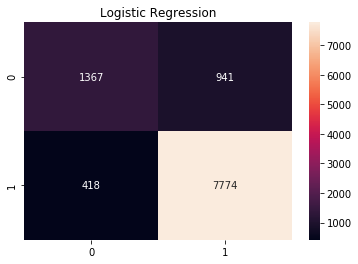

In [93]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(Y,log_predict )
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

In [95]:
GBC_predict,gbc = stratified_cv(X, Y, ensemble.GradientBoostingClassifier)
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(Y, GBC_predict)))

ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   20    24    36 ... 10488 10489 10494]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    4    16    17 ... 10468 10481 10482]
ii:  [    0     3     4 ... 10497 10498 10499]
jj:  [    1     2     9 ... 10479 10491 10493]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [   10    11    30 ... 10438 10460 10492]
ii:  [    0     1     2 ... 10496 10498 10499]
jj:  [    3    12    13 ... 10473 10474 10497]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    5    35    38 ... 10462 10486 10490]
ii:  [    0     1     2 ... 10496 10497 10498]
jj:  [   21    31    32 ... 10446 10471 10499]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    6    14    34 ... 10475 10487 10495]
ii:  [    0     1     2 ... 10497 10498 10499]
jj:  [    7    27    40 ... 10455 10469 10485]
ii:  [    1     2     3 ... 10495 10497 10499]
jj:  [    0     8    19 ... 10483 10496 10498]
Gradient Boosting Classifier:  0.87


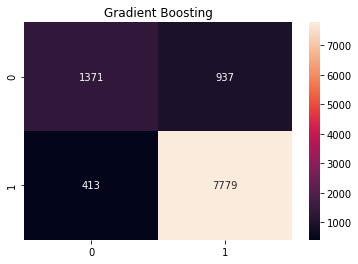

In [97]:
grad_ens_conf_matrix      = metrics.confusion_matrix(Y,GBC_predict )
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

In [291]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=12, sampling_strategy= "minority")
#X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [31]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [130]:
svmrbf=svm.SVC(kernel='rbf',C=1,gamma=0.1)
svmrbf.fit(X,Y)
prediction1=svmrbf.predict(X_val)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,Y_val))

Accuracy for rbf SVM is  0.8739047619047619


In [131]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X,Y)
prediction2=model.predict(X_val)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,Y_val))

Accuracy for rbf SVM is  0.8712380952380953


In [34]:
#KNN
model=KNeighborsClassifier() 
model.fit(X_train,Y_train)
prediction5=model.predict(X_val)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,Y_val))

The accuracy of the KNN is 0.8594285714285714


In [35]:
model=GaussianNB()
model.fit(X_train,Y_train)
prediction6=model.predict(X_val)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,Y_val))

The accuracy of the NaiveBayes is 0.26780952380952383


In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Using Logistic Regression for classification
#clf = LogisticRegression()
#clf.fit(X_train,Y_train)
#class_weight = {1:.1, 0:.35}
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

print("Evalute based on validation set")
print("f1 : " + " %s" % f1_score(Y_val, clf.predict(X_val)))
print("accuracy score" + " %s" % accuracy_score(Y_val, clf.predict(X_val)))
print("recall score micro: " + " %s" % recall_score(Y_val, clf.predict(X_val), average='micro'))
print("recall score macro: " + " %s" % recall_score(Y_val, clf.predict(X_val), average='macro'))

Evalute based on validation set
f1 :  0.9058682634730539
accuracy score 0.8502857142857143
recall score micro:  0.8502857142857143
recall score macro:  0.7528261973682464


In [66]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
#class_weight = {1:.1, 0:.35}


print("Evalute based on validation set")
print("f1 : " + " %s" % f1_score(Y_val, clf.predict(X_val)))
print("accuracy score" + " %s" % accuracy_score(Y_val, clf.predict(X_val)))
print("recall score micro: " + " %s" % recall_score(Y_val, clf.predict(X_val), average='micro'))
print("recall score macro: " + " %s" % recall_score(Y_val, clf.predict(X_val), average='macro'))

Evalute based on validation set
f1 :  0.9150763358778625
accuracy score 0.8643809523809524
recall score micro:  0.8643809523809524
recall score macro:  0.7679016013596951


/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs f

,CV Mean,Std
Linear Svm,0.871429,0.012606
Radial Svm,0.870857,0.012485
Logistic Regression,0.870952,0.012258
KNN,0.866190,0.011068
Decision Tree,0.839810,0.014654
Naive Bayes,0.288762,0.039216
Random Forest,0.862381,0.010590


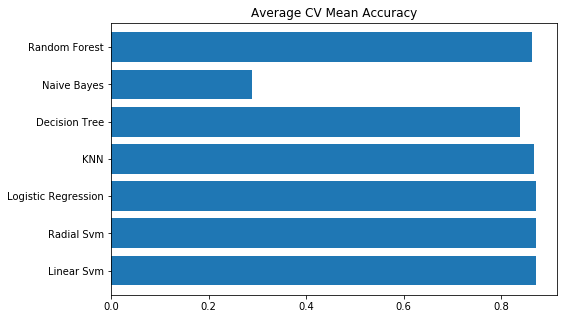

In [333]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [ ]:
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')

In [40]:
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.3min finished


0.8621904761904762
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [38]:
from sklearn import ensemble
gb = ensemble.GradientBoostingClassifier()
gb.fit(X_train,Y_train)
print("f1 : " + " %s" % f1_score(Y_val, gb.predict(X_val)))
print("accuracy score" + " %s" % accuracy_score(Y_val, gb.predict(X_val)))

f1 :  0.9215547703180211
accuracy score 0.8731428571428571


In [316]:
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

[1.34512682e-01 1.07265501e-01 8.29728276e-02 1.30115952e-02
 2.14931004e-02 1.29942643e-01 4.87657764e-02 2.34972806e-02
 8.17157618e-03 3.25104665e-03 1.12100018e-03 4.26077272e-04
 7.85326484e-04 5.18228119e-04 2.48034178e-03 8.19900608e-04
 1.47244406e-02 8.90503104e-03 4.84324861e-03 5.57222335e-03
 1.50917283e-03 1.13928780e-03 3.04936311e-03 5.04362697e-05
 2.12303418e-02 6.21275516e-04 2.68455908e-03 8.35270464e-03
 2.62500980e-03 6.27321841e-03 1.89604651e-02 1.96028662e-03
 1.25430999e-03 4.90559505e-04 2.08472638e-03 1.64057193e-03
 1.31846487e-03 2.78519127e-03 3.60771778e-04 3.31654670e-04
 4.55254083e-04 3.76310488e-03 1.61228063e-03 1.04733826e-03
 6.55798836e-04 6.02624642e-04 1.30592324e-02 7.41693876e-04
 3.47160576e-04 7.31019609e-04 1.54280508e-03 4.24378507e-04
 3.25513688e-03 3.91317513e-04 8.90344569e-05 3.17563891e-05
 5.48416576e-04 6.92438191e-04 8.91349405e-04 1.47410862e-03
 9.02910061e-04 0.00000000e+00 0.00000000e+00 2.27343253e-05
 4.50485879e-04 5.413633

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

Using TensorFlow backend.


In [159]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim =48 , init = 'uniform', activation = 'relu', input_dim = 109))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 24, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=109, units=48, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=24, kernel_initializer="uniform")`
  import sys
/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [163]:
classifier.fit(X, Y, batch_size = 16, nb_epoch = 20)

Epoch 1/20
  688/10500 [>.............................] - ETA: 2s - loss: 0.4663 - acc: 0.8517

/Users/Trinadh.Singaladevi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


10500/10500 [==============================] - 2s 194us/step - loss: 0.3827 - acc: 0.8702
Epoch 2/20
10500/10500 [==============================] - 2s 189us/step - loss: 0.3663 - acc: 0.8730
Epoch 3/20
10500/10500 [==============================] - 2s 191us/step - loss: 0.3635 - acc: 0.8727
Epoch 4/20
10500/10500 [==============================] - 2s 203us/step - loss: 0.3624 - acc: 0.8732
Epoch 5/20
10500/10500 [==============================] - 2s 196us/step - loss: 0.3616 - acc: 0.8730
Epoch 6/20
10500/10500 [==============================] - 2s 200us/step - loss: 0.3600 - acc: 0.8731
Epoch 7/20
10500/10500 [==============================] - 2s 201us/step - loss: 0.3594 - acc: 0.8736
Epoch 8/20
10500/10500 [==============================] - 2s 202us/step - loss: 0.3594 - acc: 0.8735
Epoch 9/20
10500/10500 [==============================] - 2s 202us/step - loss: 0.3582 - acc: 0.8732
Epoch 10/20
10500/10500 [==============================] - 2s 204us/step - loss: 0.3579 - acc: 0.8737


In [144]:
y_pred = classifier.predict(X_val)

accuracy of the model:  0.8735238095238095


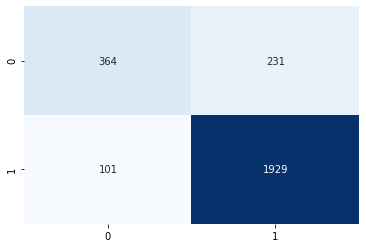

In [145]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_val, y_pred.round())
print('accuracy of the model: ',ac)

# Prediction

In [178]:
testdataset = pd.read_csv('test.csv')
validateData = testdataset
validateData

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/
...,...,...,...,...
4495,u23966,15/12/14 21:11,15/12/14 21:12,A00001/B00031/C00044/D03435/;A00001/B00031/C00...
4496,u20527,02/12/14 7:53,02/12/14 7:54,A00002/B00002/C00004/D17474/;A00002/B00002/C00...
4497,u13253,15/11/14 21:38,15/11/14 21:46,A00002/B00007/C00098/D03350/;A00002/B00007/C00...
4498,u17094,17/12/14 8:51,17/12/14 8:51,A00001/B00031/C00044/D09604/


In [179]:
validateData = timeconversion(validateData)

In [180]:
validateData = convertweekday(validateData)


In [181]:
validateData.head()

,session_id,startTime,endTime,ProductList,date,start_time,day,time
0,u12112,2014-12-08 13:36:00,2014-12-08 13:36:00,A00002/B00003/C00006/D19956/,08/12/14,13:36,0,0.0
1,u19725,2014-12-19 13:52:00,2014-12-19 13:52:00,A00002/B00005/C00067/D02026/,19/12/14,13:52,4,0.0
2,u11795,2014-12-01 10:44:00,2014-12-01 10:44:00,A00002/B00002/C00004/D12538/,01/12/14,10:44,0,0.0
3,u22639,2014-12-08 20:19:00,2014-12-08 20:22:00,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,08/12/14,20:19,0,3.0
4,u18034,2014-12-15 19:33:00,2014-12-15 19:33:00,A00002/B00001/C00010/D23419/,15/12/14,19:33,0,0.0


In [182]:
new_col_lst = validateData['ProductList'].apply(lambda x: extract_product(x))    
new_col_df = pd.DataFrame(new_col_lst.tolist(),columns =new_col)

A00002/B00003/C00006/D19956/
A00002/B00005/C00067/D02026/
A00002/B00002/C00004/D12538/
A00002/B00003/C00079/D22781/;A00002/B00003/C00079/D22782/;A00002/B00003/C00079/D19325/;A00002/B00003/C00079/D22786/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00010/D23419/
A00001/B00009/C00028/D13690/;A00001/B00009/C00028/D00696/;A00001/B00031/C00044/D13693/;A00001/B00009/C00028/D13696/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00001/B00031/C00044/D13454/
A00001/B00009/C00028/D11956/
A00002/B00003/C00005/D26497/
A00001/B00001/C00019/D04978/;A00001/B00001/C00019/D03824/;A00001/B00001/C00019/D31655/;A00001/B00001/C00019/D31656/
first_lvl A00001
['A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00010/D18416/
A00002/B00005/C00013/D02174/
A00004/B00049/C00083/D12236/;A00004/B00013/C00117/D12237/
first_lvl A00004
['A00004', 'A00004']
unique_lv1 1
most_f

unique_lv1 1
most_freq_lv1 A00002
A00002/B00004/C00018/D27082/;A00003/B00039/C00120/D29047/;A00002/B00003/C00046/D29051/
first_lvl A00002
['A00002', 'A00003', 'A00002']
unique_lv1 2
most_freq_lv1 A00002
A00002/B00003/C00005/D06902/
A00002/B00001/C00100/D13602/;A00002/B00001/C00100/D13603/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00004/C00178/D03118/
A00001/B00015/C00042/D10606/;A00001/B00015/C00043/D05393/;A00001/B00015/C00043/D29269/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00001/B00009/C00038/D03265/;A00001/B00009/C00038/D03267/;A00001/B00009/C00038/D03268/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00009/D10739/;A00002/B00002/C00009/D10741/;A00002/B00002/C00022/D10051/;A00002/B00002/C00009/D10743/;A00002/B00002/C00009/D10747/;A00002/B00002/C00022/D10749/;A00002/B00002/C00009/D10730/;A00002/B00002/C00009/D10746/;A00002/B00002/C00009/D10753/;A00002/B00

first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00005/C00057/D09297/;A00002/B00005/C00067/D09301/;A00002/B00005/C00056/D07782/;A00002/B00005/C00058/D06145/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00005/B00044/C00145/D25691/;A00005/B00044/C00145/D25693/;A00005/B00044/C00145/D25694/;A00005/B00044/C00145/D25696/;A00005/B00044/C00145/D25697/;A00005/B00044/C00145/D25698/;A00005/B00044/C00145/D25699/;A00005/B00044/C00145/D25701/
first_lvl A00005
['A00005', 'A00005', 'A00005', 'A00005', 'A00005', 'A00005', 'A00005', 'A00005']
unique_lv1 1
most_freq_lv1 A00005
A00002/B00003/C00014/D20842/;A00002/B00003/C00014/D20843/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00051/D09264/
A00002/B00001/C00010/D15699/;A00002/B00006/C00030/D14607/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00048/D34370/;A00003/B00012/C00048/D34373/

first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00004/C00066/D29168/
A00002/B00005/C00057/D22126/;A00002/B00005/C00013/D04595/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00015/C00021/D34033/;A00001/B00015/C00021/D34034/;A00002/B00007/C00021/D03436/;A00002/B00007/C00016/D34038/;A00001/B00004/C00132/D34044/;A00001/B00015/C00098/D34047/;A00001/B00004/C00132/D34051/;A00001/B00004/C00340/D34026/;A00001/B00004/C00132/D29871/;A00001/B00004/C00132/D29872/;A00001/B00004/C00066/D34054/
first_lvl A00001
['A00001', 'A00001', 'A00002', 'A00002', 'A00001', 'A00001', 'A00001', 'A00001', 'A00001', 'A00001', 'A00001']
unique_lv1 2
most_freq_lv1 A00001
A00005/B00018/C00047/D27627/;A00005/B00018/C00047/D25893/;A00005/B00019/C00211/D27628/;A00005/B00018/C00047/D27639/
first_lvl A00005
['A00005', 'A00005', 'A00005', 'A00005']
unique_lv1 1
most_freq_lv1 A00005
A00002/B00003/C00006/D07452/
A00001/B00004/C00066/D26872/
A00002/B0000

first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00006/C00030/D33757/
A00002/B00002/C00007/D00297/;A00002/B00002/C00003/D21526/;A00002/B00002/C00003/D21111/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00081/D02445/
A00002/B00007/C00016/D19979/
A00003/B00022/C00028/D34155/;A00003/B00022/C00073/D34157/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00003/B00012/C00051/D02736/
A00002/B00002/C00002/D12140/;A00002/B00002/C00002/D12141/;A00002/B00002/C00002/D02007/;A00002/B00002/C00002/D12142/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00009/C00032/D11869/;A00001/B00009/C00032/D11871/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00007/D25257/;A00002/B00002/C00007/D25258/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00022/C

first_lvl A00003
['A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00011/C00126/D20771/
A00001/B00009/C00032/D16457/;A00001/B00001/C00075/D16439/;A00001/B00001/C00019/D18058/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00001/C00059/D00307/
A00003/B00022/C00073/D27512/;A00003/B00022/C00073/D27514/;A00003/B00022/C00073/D20849/
first_lvl A00003
['A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00003/C00005/D24317/
A00002/B00001/C00059/D25151/;A00002/B00001/C00059/D22401/;A00002/B00001/C00059/D02197/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00017/C00012/D24440/
A00002/B00003/C00014/D17992/
A00001/B00009/C00186/D34378/;A00001/B00009/C00186/D34379/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00002/D00735/
A00002/B00003/C00046/D11533/
A00002/B00016/C00070/D23172/;A00002/B00016/C00044/D23174/;A00002/B00016/C00012

most_freq_lv1 A00003
A00001/B00009/C00038/D06338/
A00002/B00011/C00114/D16066/;A00002/B00004/C00337/D27106/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00005/D21468/
A00003/B00012/C00051/D23943/
A00001/B00015/C00111/D26122/
A00002/B00003/C00014/D19632/
A00011/B00077/C00408/D26820/;A00011/B00077/C00341/D26821/;A00002/B00002/C00007/D00266/
first_lvl A00011
['A00011', 'A00011', 'A00002']
unique_lv1 2
most_freq_lv1 A00011
A00003/B00026/C00257/D28665/
A00003/B00022/C00074/D27919/
A00002/B00003/C00006/D17606/;A00002/B00003/C00006/D13106/;A00002/B00003/C00006/D23046/;A00002/B00003/C00006/D16504/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00002/D15452/
A00003/B00048/C00347/D26052/
A00002/B00001/C00053/D23945/
A00009/B00067/C00237/D06527/
A00002/B00003/C00005/D06846/;A00002/B00003/C00005/D06854/;A00002/B00003/C00005/D06856/;A00002/B00003/C00005/D06857/;A00002/B00003/C00005/D06859/;A00002/B

unique_lv1 2
most_freq_lv1 A00002
A00002/B00003/C00006/D34327/
A00003/B00022/C00074/D31828/
A00002/B00004/C00129/D01436/
A00002/B00002/C00002/D06873/
A00002/B00002/C00004/D00168/;A00002/B00002/C00081/D11784/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00016/C00044/D04787/
A00003/B00012/C00051/D13998/;A00003/B00012/C00051/D31732/;A00003/B00012/C00051/D29852/;A00003/B00012/C00048/D24492/;A00003/B00012/C00048/D23676/;A00003/B00012/C00036/D31824/
first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00003/B00004/C00197/D32320/;A00003/B00004/C00197/D32311/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00003/C00037/D10341/
A00001/B00037/C00113/D03657/;A00001/B00037/C00113/D01479/
first_lvl A00001
['A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00003/C00005/D01378/;A00002/B00003/C00005/D01385/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_fr

first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00048/D07630/
A00003/B00012/C00051/D18017/;A00003/B00012/C00051/D17589/;A00002/B00002/C00007/D25231/;A00003/B00012/C00051/D31292/;A00003/B00012/C00051/D24088/;A00003/B00012/C00051/D31299/;A00003/B00012/C00051/D31302/;A00003/B00012/C00051/D31304/
first_lvl A00003
['A00003', 'A00003', 'A00002', 'A00003', 'A00003', 'A00003', 'A00003', 'A00003']
unique_lv1 2
most_freq_lv1 A00003
A00001/B00015/C00043/D32332/
A00001/B00001/C00029/D18507/
A00002/B00002/C00007/D24463/;A00002/B00003/C00014/D21756/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00001/B00004/C00132/D29871/;A00001/B00004/C00132/D29872/;A00001/B00031/C00091/D26808/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00003/B00028/C00012/D34497/;A00003/B00028/C00247/D07068/;A00003/B00036/C00190/D34501/;A00003/B00028/C00012/

first_lvl A00003
['A00003', 'A00003', 'A00003', 'A00002', 'A00002']
unique_lv1 2
most_freq_lv1 A00003
A00002/B00001/C00010/D22328/;A00002/B00001/C00010/D22330/;A00002/B00001/C00010/D04413/;A00002/B00001/C00010/D19057/;A00002/B00001/C00010/D01080/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00007/D27129/;A00002/B00002/C00007/D15557/;A00002/B00002/C00007/D30365/;A00002/B00002/C00007/D30368/;A00002/B00002/C00007/D30140/;A00002/B00002/C00007/D28579/;A00002/B00002/C00007/D30373/;A00002/B00002/C00003/D24310/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00001/C00059/D27273/;A00002/B00001/C00059/D01560/;A00002/B00001/C00059/D00307/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00003/C00046/D07425/
A00002/B00002/C00003/D14160/
A00003/B00012/C00036/D29570/
A00002/B00003/C00005/D24442/
A0

first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00002/D07312/
A00002/B00003/C00006/D32643/
A00001/B00009/C00028/D03794/;A00001/B00009/C00032/D12461/;A00001/B00015/C00042/D08135/
first_lvl A00001
['A00001', 'A00001', 'A00001']
unique_lv1 1
most_freq_lv1 A00001
A00002/B00002/C00003/D14778/
A00002/B00001/C00010/D01034/;A00002/B00007/C00016/D01031/;A00002/B00001/C00053/D01058/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00009/D02831/
A00003/B00026/C00248/D09579/
A00002/B00002/C00011/D17645/
A00002/B00002/C00007/D15557/;A00002/B00002/C00007/D19389/;A00002/B00002/C00007/D02552/
first_lvl A00002
['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00002/C00009/D01718/
A00001/B00001/C00019/D11038/
A00002/B00001/C00075/D05313/
A00002/B00002/C00002/D04028/;A00002/B00002/C00002/D06058/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00

['A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00020/C00069/D19308/;A00003/B00020/C00069/D19297/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00005/C00136/D01099/
A00002/B00003/C00014/D00738/;A00002/B00001/C00020/D08154/;A00002/B00003/C00046/D08159/;A00002/B00003/C00005/D08160/;A00002/B00002/C00007/D00400/;A00002/B00002/C00007/D02206/;A00002/B00002/C00002/D08196/
first_lvl A00002
['A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00003/B00012/C00036/D12385/;A00003/B00012/C00036/D12827/
first_lvl A00003
['A00003', 'A00003']
unique_lv1 1
most_freq_lv1 A00003
A00002/B00001/C00020/D25349/
A00002/B00016/C00131/D22584/
A00002/B00002/C00007/D28787/
A00002/B00003/C00014/D24227/;A00002/B00003/C00014/D10071/
first_lvl A00002
['A00002', 'A00002']
unique_lv1 1
most_freq_lv1 A00002
A00002/B00005/C00056/D22730/
A00002/B00003/C00014/D14541/
A00002/B00003/C00006/D11592/;A00002/B00003/C00

In [183]:
validateData1 = pd.concat([validateData, new_col_df], axis=1)

In [184]:
validateData1.drop(['session_id','startTime','endTime','ProductList','start_time','date'],axis = 1,inplace = True)

In [185]:
X2 = pd.get_dummies(validateData1)

In [186]:
X2

,day,time,NumProduct,UniqueA,UniqueB,FirstA_A00001,FirstA_A00002,FirstA_A00003,FirstA_A00004,FirstA_A00005,...,MostA_A00002,MostA_A00003,MostA_A00004,MostA_A00005,MostA_A00006,MostA_A00007,MostA_A00008,MostA_A00009,MostA_A00010,MostA_A00011
0,0,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,3.0,4,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0.0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,1.0,3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4496,1,1.0,2,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4497,5,8.0,9,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4498,2,0.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
#for missing columns in test data when compared to training data
missing_cols = set( X1.columns ) - set( X2.columns )
print(missing_cols)
for c in missing_cols:
    X2[c] = 0
X2 = X2[X1.columns]

{'FirstB_B00074', 'FirstB_B00078', 'FirstB_B00033', 'FirstB_B00008', 'FirstB_B00080', 'FirstB_B00052', 'FirstB_B00085', 'FirstB_B00059', 'FirstB_B00082', 'FirstB_B00064', 'FirstB_B00083', 'FirstB_B00073', 'FirstB_B00076'}


In [188]:
X2 = transformdata(scaler,X2)


In [189]:
nnscore = classifier.predict(X2)

In [190]:
#svmscore = svmrbf.predict(X2)
nnscore = np.where(nnscore > 0.5,'female','male')

In [191]:
testdataset['gender'] = nnscore

In [134]:
testdataset['gender'].replace([1,0],['female','male'],inplace = True)
#data['gender'].replace(['male','female'],[0,1],inplace=True)

In [193]:
testdataset[["session_id","gender"]].to_csv("nn_submission1.csv",index = False)